In [4]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import mpld3
from mpld3 import plugins
mpld3.enable_notebook()



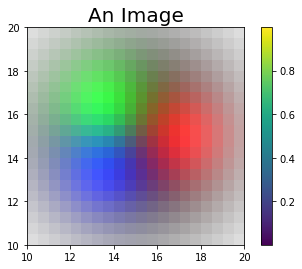

In [3]:
fig, ax = plt.subplots()

x = np.linspace(-2, 2, 20)
y = x[:, None]
X = np.zeros((20, 20, 4))

X[:, :, 0] = np.exp(- (x - 1) ** 2 - (y) ** 2)
X[:, :, 1] = np.exp(- (x + 0.71) ** 2 - (y - 0.71) ** 2)
X[:, :, 2] = np.exp(- (x + 0.71) ** 2 - (y + 0.71) ** 2)
X[:, :, 3] = np.exp(-0.25 * (x ** 2 + y ** 2))

im = ax.imshow(X, extent=(10, 20, 10, 20),
               origin='lower', zorder=1, interpolation='nearest')
fig.colorbar(im, ax=ax)

ax.set_title('An Image', size=20)

plugins.connect(fig, plugins.MousePosition(fontsize=14))

# mpld3.show()

In [5]:
posterior = xr.load_dataset('../data/analysis/sa-s06/posterior_sa-S06_aw1600.nc')
likelihood = xr.load_dataset('../data/analysis/sa-s06/likelihood_sa-S06_aw1600.nc')

In [6]:
y,x = np.meshgrid(posterior['lat'], posterior['lon'])

In [9]:
posterior['Porto-Alegre'][0]

<xarray.DataArray 'Porto-Alegre' (x: 98, y: 80)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    time     int64 1600
    lon      (x) float64 -73.0 -71.99 -70.98 -69.97 ... 21.97 22.98 23.99 25.0
    lat      (y) float64 -80.0 -78.99 -77.97 -76.96 ... -3.038 -2.025 -1.013 0.0
Dimensions without coordinates: x, y

/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


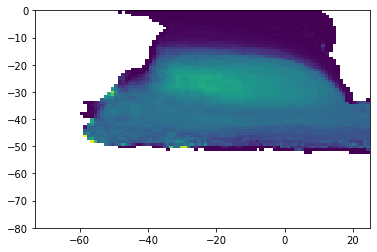

In [18]:
fig, ax = plt.subplots()
im = ax.pcolormesh(x,y, posterior['Porto-Alegre'][0])

# plugins.connect(fig, plugins.PointLabelTooltip(im))

In [22]:
im

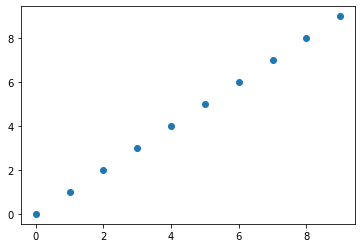

In [15]:
fig, ax = plt.subplots()
points = ax.plot(range(10), 'o')
plugins.connect(fig, plugins.PointLabelTooltip(points[0]))

In [ ]:
plugins.P